### **Deep learning** with **Python** and **Pytorch** tutorial series, starting from the basics.

###Prep setting

In [ ]:
import torch

In [ ]:
x = torch.Tensor([5,3])
y= torch.Tensor([2,1])

print(x*y) #scalar product 

tensor([10.,  3.])


In [ ]:
torch.tensor([[1., -1.], [1., -1.]])

tensor([[ 1., -1.],
        [ 1., -1.]])

In [ ]:
torch.tensor([[1, 2, 3], [4, 5, 6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
x = torch.ones([2, 4], dtype=torch.float64)

In [ ]:
print(x, x.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64) torch.Size([2, 4])


In [ ]:
# Random initialization 
y = torch.rand([2,5])
y

tensor([[0.3636, 0.0370, 0.3393, 0.2270, 0.0730],
        [0.9129, 0.7297, 0.1648, 0.9730, 0.9311]])

In [ ]:
# Flatten a 2x5 to a 1x10
y.view([1,10]) #equivalent to reshape on numpy 

tensor([[0.3636, 0.0370, 0.3393, 0.2270, 0.0730, 0.9129, 0.7297, 0.1648, 0.9730,
         0.9311]])

In [ ]:
# y.view doesn't modify y 
y

tensor([[0.3636, 0.0370, 0.3393, 0.2270, 0.0730],
        [0.9129, 0.7297, 0.1648, 0.9730, 0.9311]])

In [ ]:
# To modify  : 
y = y.view([1,10])

In [ ]:
pip install torchvision 

In [ ]:
import torchvision  # has a lot of vision data 
from torchvision import transforms, datasets

### Getting the data

In [ ]:
train = datasets.MNIST("", train=True, download = True, 
                       transform = transforms.Compose([transforms.ToTensor()]))

#out of sample testing data 
test = datasets.MNIST("", train=False, download = True, 
                       transform = transforms.Compose([transforms.ToTensor()]))

In [ ]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle = True)

In [ ]:
# batch_size refers to the number of training examples utilized in one iteration.
# batch_size, shuffle : the objective is to to build of NN that can generalise to unseen data 

In [ ]:
for data in trainset:
  print(data) 
  break 
  # an entire batch : 10 example

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
x, y = data # data is a tensorobject with two attributes 

In [ ]:
img = data[0][0] # that's one image 
img.shape #that's not a valid shape for an image 

torch.Size([1, 28, 28])

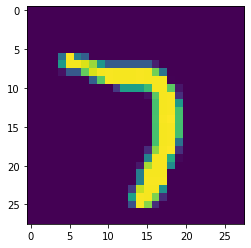

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img.view(28,28))

In [ ]:
# Check if the dataset is balanced 

total = 0 
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0, 9:0}

for data in trainset:
  xs, ys = data 
  for y in ys :
    counter_dict[int(y)] +=1
  total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
# Compute proportions 
for i in counter_dict:
  print(f"{i}:{counter_dict[i]/total}")

0:0.9871666666666666
1:1.1236666666666666
2:0.993
3:1.0218333333333334
4:0.9736666666666667
5:0.9035
6:0.9863333333333333
7:1.0441666666666667
8:0.9751666666666666
9:0.9915


## Let's build the Neural Network 

In [ ]:
import torch.nn as nn 
import torch.nn.functional as F #pass parameters 

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10) #10, nb of classes 
  
  def forward(self, x): # How the data flows in the network 
    x = F.relu(self.fc1(x)) # is the neuron firing ? 
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x) 
    return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X = torch.rand((28,28)) #generate a random image 
X = X.view(-1,28*28) 

In [ ]:
#let's pass it to the Neural Network 
output = net(X)
output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


tensor([[-2.2679, -2.4245, -2.2567, -2.1958, -2.2773, -2.3585, -2.3661, -2.3445,
         -2.2660, -2.2888]], grad_fn=<LogSoftmaxBackward0>)

### Train the network

In this part, we adjust the parameters of the network (weights and bias) that optimize the loss

In [ ]:
import torch.optim as optim 

optimizer = optim.Adam(net.parameters(), lr = 0.001)
#decaying learning rate 

EPOCHS = 3

for epoch in range(EPOCHS):
  for data in trainset:
    # data is a batch of featuresets and lavels
    X, y = data
    net.zero_grad()
   # zero_grad() restarts looping without losses from the last step if you use the gradient method for decreasing the error (or losses). 
   # If you do not use zero_grad() the loss will increase not decrease as required.
    output = net(X.view(-1,28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step() #adjusting the weights
  print(loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


tensor(0.1641, grad_fn=<NllLossBackward0>)
tensor(0.0420, grad_fn=<NllLossBackward0>)
tensor(0.0411, grad_fn=<NllLossBackward0>)


**Notes** : 
- Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks.

Implements Adam algorithm.

\begin{aligned} &\rule{110mm}{0.4pt} \\ &\textbf{input} : \gamma \text{ (lr)}, \beta_1, \beta_2 \text{ (betas)},\theta_0 \text{ (params)},f(\theta) \text{ (objective)} \\ &\hspace{13mm} \lambda \text{ (weight decay)}, \: amsgrad \\ &\textbf{initialize} : m_0 \leftarrow 0 \text{ ( first moment)}, v_0\leftarrow 0 \text{ (second moment)},\: \widehat{v_0}^{max}\leftarrow 0\\[-1.ex] &\rule{110mm}{0.4pt} \\ &\textbf{for} \: t=1 \: \textbf{to} \: \ldots \: \textbf{do} \\ &\hspace{5mm}g_t \leftarrow \nabla_{\theta} f_t (\theta_{t-1}) \\ &\hspace{5mm}\textbf{if} \: \lambda \neq 0 \\ &\hspace{10mm} g_t \leftarrow g_t + \lambda \theta_{t-1} \\ &\hspace{5mm}m_t \leftarrow \beta_1 m_{t-1} + (1 - \beta_1) g_t \\ &\hspace{5mm}v_t \leftarrow \beta_2 v_{t-1} + (1-\beta_2) g^2_t \\ &\hspace{5mm}\widehat{m_t} \leftarrow m_t/\big(1-\beta_1^t \big) \\ &\hspace{5mm}\widehat{v_t} \leftarrow v_t/\big(1-\beta_2^t \big) \\ &\hspace{5mm}\textbf{if} \: amsgrad \\ &\hspace{10mm}\widehat{v_t}^{max} \leftarrow \mathrm{max}(\widehat{v_t}^{max}, \widehat{v_t}) \\ &\hspace{10mm}\theta_t \leftarrow \theta_{t-1} - \gamma \widehat{m_t}/ \big(\sqrt{\widehat{v_t}^{max}} + \epsilon \big) \\ &\hspace{5mm}\textbf{else} \\ &\hspace{10mm}\theta_t \leftarrow \theta_{t-1} - \gamma \widehat{m_t}/ \big(\sqrt{\widehat{v_t}} + \epsilon \big) \\ &\rule{110mm}{0.4pt} \\[-1.ex] &\bf{return} \: \theta_t \\[-1.ex] &\rule{110mm}{0.4pt} \\[-1.ex] \end{aligned}


In [ ]:
correct = 0 
total = 0 

with torch.no_grad():
  for data in trainset:
    X, y = data 
    output = net(X.view(-1,784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct +=1
      total += 1
print("Accuracy:", round(correct/total, 3))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


Accuracy: 0.979


<function matplotlib.pyplot.show>

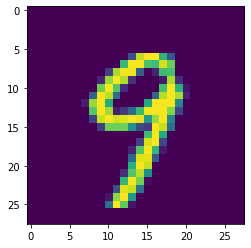

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show

In [ ]:
print(torch.argmax(net(X[0].view(-1,784))))

tensor(9)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


tensor(4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


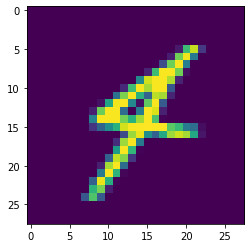

In [ ]:
plt.imshow(X[3].view(28,28))
plt.show
print(torch.argmax(net(X[3].view(-1,784))))